In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [27]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [28]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [30]:
def plot_sample(x,y,index):
    plt.figure(figsize= (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

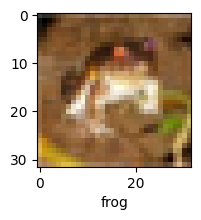

In [31]:
plot_sample(x_train, y_train, 0)

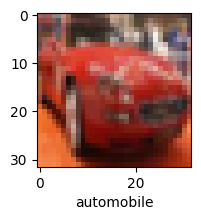

In [32]:
plot_sample(x_train, y_train, 5)

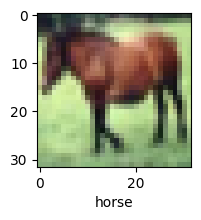

In [33]:
plot_sample(x_train, y_train, 7)

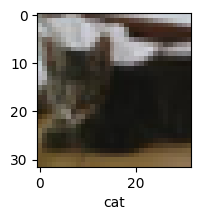

In [34]:
plot_sample(x_train, y_train, 9)

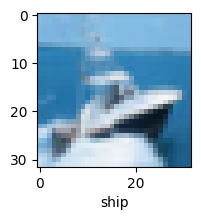

In [35]:
plot_sample(x_train, y_train, 8)

In [38]:
x_train = x_train/255
x_test = x_test/255

In [48]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
 ])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3085 - loss: 1.9311
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4114 - loss: 1.6520
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4522 - loss: 1.5532
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.4769 - loss: 1.4915
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.4939 - loss: 1.4394


In [49]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3938 - loss: 1.6596


[1.6539052724838257, 0.396699994802475]

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.35      0.47      1000
           1       0.30      0.88      0.45      1000
           2       0.48      0.23      0.31      1000
           3       0.38      0.11      0.17      1000
           4       0.55      0.21      0.30      1000
           5       0.25      0.70      0.37      1000
           6       0.67      0.26      0.37      1000
           7       0.48      0.58      0.52      1000
           8       0.71      0.37      0.49      1000
           9       0.55      0.27      0.37      1000

    accuracy                           0.40     10000
   macro avg       0.51      0.40      0.38     10000
weighted avg       0.51      0.40      0.38     10000



In [53]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
 ])

In [57]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [58]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3657 - loss: 1.7392
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5824 - loss: 1.1908
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6336 - loss: 1.0407
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6709 - loss: 0.9532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6928 - loss: 0.8888
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7162 - loss: 0.8186
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7330 - loss: 0.7720
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7474 - loss: 0.7222
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7609 - loss: 0.6882
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7717 - loss: 0.6530


In [61]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6852 - loss: 0.9641


[0.9713292121887207, 0.6808000206947327]

In [62]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

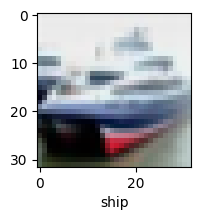

In [60]:
y_test = y_test.reshape(-1,)
plot_sample(x_test, y_test, 1)

In [64]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[5.19173045e-04, 6.25284447e-05, 3.98203294e-04, 9.76774156e-01,
        2.05988763e-03, 6.19359640e-03, 1.10220751e-02, 4.38726274e-05,
        2.86818971e-03, 5.81873937e-05],
       [1.06671930e-03, 3.15648377e-01, 2.21127380e-06, 3.18727416e-07,
        1.23235173e-08, 3.46599172e-09, 7.81749954e-09, 7.42110373e-10,
        6.83255315e-01, 2.69670563e-05],
       [1.24762887e-02, 1.03432864e-01, 2.71173753e-03, 7.98782520e-03,
        1.32577692e-03, 2.19084221e-04, 8.52073572e-05, 1.65965222e-03,
        8.67470205e-01, 2.63126940e-03],
       [3.85684133e-01, 3.03723700e-02, 5.30144989e-01, 3.42317624e-03,
        3.08481068e-03, 1.06046420e-04, 1.80194707e-04, 1.10383689e-05,
        4.09742333e-02, 6.01901393e-03],
       [4.99022804e-07, 1.54634540e-06, 3.96867795e-03, 1.80272770e-03,
        4.00851578e-01, 1.44929450e-04, 5.93225241e-01, 1.56782471e-06,
        3.05664958e-06, 1.17050696e-07]], dtype=float32)

In [71]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(2), np.int64(6)]

In [72]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

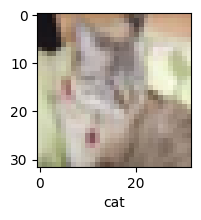

In [80]:
plot_sample(x_test,y_test, 8)

In [81]:
classes[y_classes[8]]

'cat'